# Project: Investigate TMDB Movies dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Background

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

### Questions to answer
<ul>
<li><a href="#q1">How many movies are made each year?</a></li>
<li><a href="#q2">Which movies are most popular?</a></li>
<li><a href="#q3">Which movies have the highest revenue?</a></li>
<li><a href="#q4">Which movies have the biggest budget?</a></li>
<li><a href="#q5">Who are the most successful directors? Who made the most movies?</a></li>
<li><a href="#q6">What is the ideal movie length?</a></li>
<li><a href="#q7">What are the most common genres?</a></li>
<li><a href="#q8">How many movies did each production company make?</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The shape of our dataset

In [3]:
df.shape

(10866, 21)

We see the datatypes and any missing values of every column in the next code cell

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Remarks**
- We notice that `release_date` is of type `object`, it should be `datetime` for better manipulation of this attribute.
- There are multiple columns with missing data, Let's investigate which columns has missing data in the next code cell.

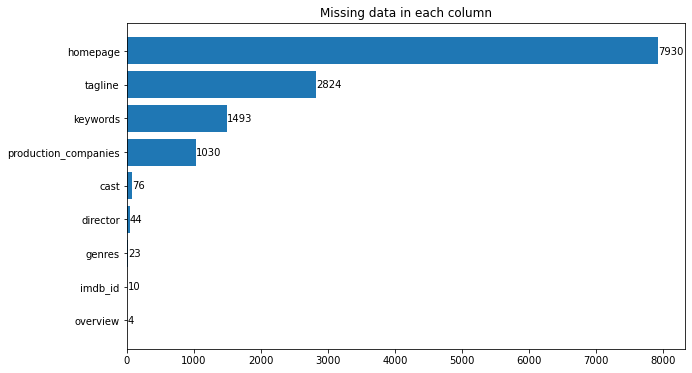

In [5]:
# getting columns with missing values and the count of missing values
missing = df.isnull().sum()[df.isnull().sum()>0].sort_values()
# plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(missing.keys(), missing.values)
ax.set_title("Missing data in each column")
ax.bar_label(bars)
plt.show()

**Insights**
- `homepage` column has over 70% missing values.
- other column that have a relatively high ratio of missing values are `tagline`, `keywords`, `production_companies`.
- Each of `cast`, `director`, `genres`, `imdb_id`, `overview` has less than 80 missing values.

Next, We will see whether there are any duplicate values

In [6]:
df.duplicated().sum()

1

Indeed, there is one duplicated row. We can see it in the next cell

In [7]:
df[df['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Insights**
- A bit over 55% of movies have a `revenue` of `0$` which is not valid. The 0's are probably missing data.
- The same thing holds true for `revenue_adj`, `budget` & `budget_adj`.
- There are a few movies (31 to be exact) that have a `runtime` of `0`. It's most likely missing data as a movie can't be 0 minutes long.

> PS: the next code cells shows how to get the numbers shown in the insights.

In [9]:
df[df['revenue']==0].shape[0]/df.shape[0]*100

55.365359838026876

In [10]:
df[df['budget']==0].shape[0]/df.shape[0]*100

52.42039388919566

In [11]:
df[df['runtime']==0].shape[0]

31

**Problems**
- `release_date` is of type `object` instead of `datetime`.
- There is one duplicated row.
- There are multiple columns with missing values.
- There are some columns such as `revenue` and `budget` that have 0's to represent missing data.

### Data Cleaning
First, we will convert the datatype of `release_date` to `datetime`
Converting the datatype directly will cause a problem for movies published in the 90's as pandas will convert the year 1966 to 2066 instead.

We will make the year a 4 digit number first with the help of the `release_year` column, then we will convert the datatype

In [12]:
# converting release_date data type to datetime
df['release_date'] = df['release_date'].str[:-2] + df['release_year'].astype('str')
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%Y')
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]

Now, we will drop the duplicated row in the next cell

In [13]:
df.drop_duplicates(inplace=True)

For the missing values, some columns can't be filled in any other way but with some research as `tagline`, `keywords`, `cast`...

A missing value in `homepage` means the movie does not have a website.


For the `0's` in `budget` and `revenue`. I will replace them by the mean budget and revenue respectively in that year.

First I will replace the zeros by `NaN` so that they don't affect the mean.

In [14]:
df['revenue'].replace(to_replace = 0, value = np.nan, inplace=True)
df['budget'].replace(to_replace = 0, value = np.nan, inplace=True)

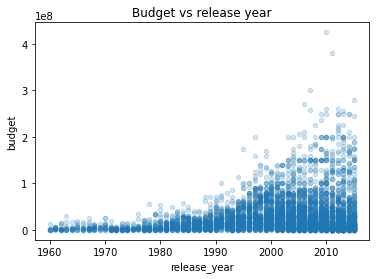

In [15]:
df.plot(x='release_year', y='budget', kind='scatter', alpha=0.2)
plt.title('Budget vs release year')
plt.show()

In [16]:
# finding the mean revenue and budget for movies grouped by year
fill_values = df.groupby('release_year').agg({'revenue': 'mean', 'budget': 'mean'})

In [17]:
# these two columns will help me fill in the missing data
df['rev'] = fill_values.loc[df['release_year'],'revenue'].values
df['budg'] = fill_values.loc[df['release_year'],'budget'].values

In [18]:
# filling the missing columns with the corresponding value
df['revenue'] = np.where(df['revenue'].isnull(), df['rev'].values, df['revenue'].values)
df['budget'] = np.where(df['budget'].isnull(), df['budg'].values, df['budget'].values)

In [19]:
# dropping the two columns that we created to fill revenue and budget
df.drop(['rev', 'budg'], axis=1, inplace=True)

for the genres, there are 23 rows with missing values. Since it is unsignificant, I will drop those rows in the next cell

In [20]:
df.dropna(subset=['genres'], inplace=True)

There are 1030 rows with missing `production_companies`. I'm going to replace the null value with other so I can further analyse the data in the column later

In [21]:
df['production_companies'] = df['production_companies'].fillna('other|')

<a id='eda'></a>
## Exploratory Data Analysis

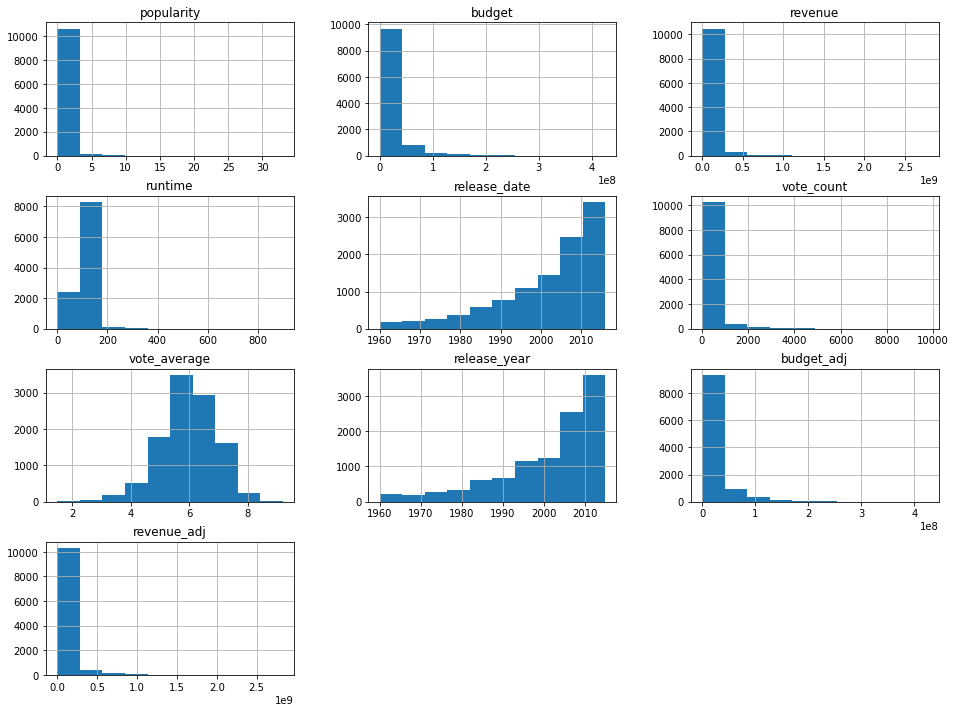

In [22]:
df.drop(['id'], axis=1).hist(figsize=(16,12));

**Insights**
- `popularity`, `budget`, `revenue`, `runtime`, `votecount` are all positively skewed.
- `release_year` and `release_date` are negatively skewed which means that more and more movies are produced every year.
- `vote_average` is kind of normally distributed.

<a id='q1'></a>
### How many movies are made each year?

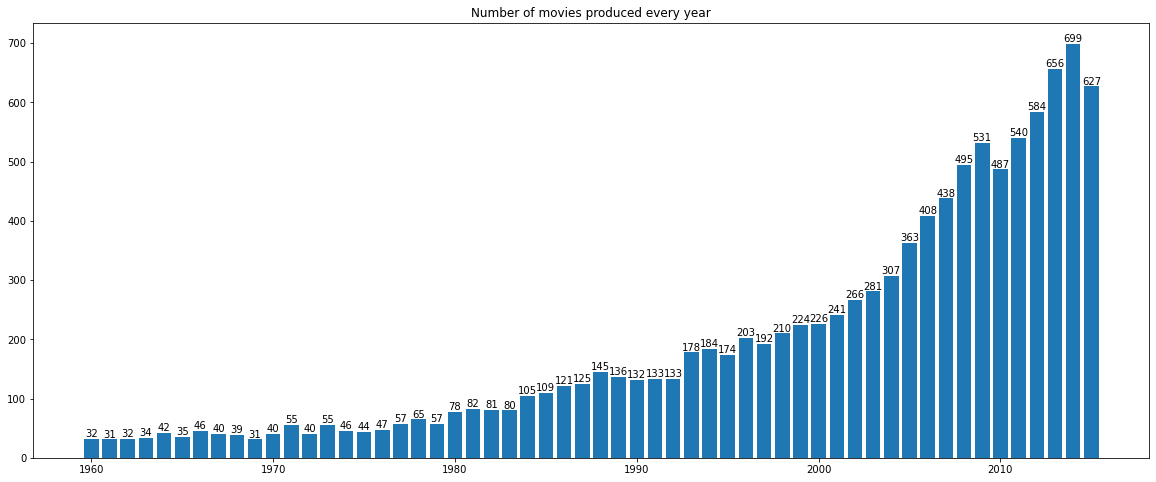

In [23]:
movies_p_year = df['release_year'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(20, 8))
bars = ax.bar(movies_p_year.keys(), movies_p_year.values)
ax.set_title("Number of movies produced every year")
ax.bar_label(bars)
plt.show()

From the previous bar chart, we immediately notice how the number of movies produced every year is increasing. In the sixties, 30 to 45 movies were produced every year. Then the number started rising untill it doubled x20 times when it reached a max of 700 movies by 2014
<a id='q2'></a>
### Which movies are most popular?

In [24]:
df.loc[df['popularity'].nlargest(10).keys(),['original_title', 'popularity', 'genres', 'release_year', 'director', 'production_companies']]

,original_title,popularity,genres,release_year,director,production_companies
0,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,28.419936,Action|Adventure|Science Fiction|Thriller,2015,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...
629,Interstellar,24.949134,Adventure|Drama|Science Fiction,2014,Christopher Nolan,Paramount Pictures|Legendary Pictures|Warner B...
630,Guardians of the Galaxy,14.311205,Action|Science Fiction|Adventure,2014,James Gunn,Marvel Studios|Moving Picture Company (MPC)|Bu...
2,Insurgent,13.112507,Adventure|Science Fiction|Thriller,2015,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...
631,Captain America: The Winter Soldier,12.971027,Action|Adventure|Science Fiction,2014,Joe Russo|Anthony Russo,Marvel Studios
1329,Star Wars,12.037933,Adventure|Action|Science Fiction,1977,George Lucas,Lucasfilm|Twentieth Century Fox Film Corporation
632,John Wick,11.422751,Action|Thriller,2014,Chad Stahelski|David Leitch,Thunder Road Pictures|Warner Bros.|87Eleven|De...
3,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot
633,The Hunger Games: Mockingjay - Part 1,10.739009,Science Fiction|Adventure|Thriller,2014,Francis Lawrence,Lionsgate|Color Force


<a id='q3'></a>
### Which movies have the highest revenue?

In [25]:
df.loc[df['revenue'].nlargest(10).keys(),['original_title', 'revenue', 'budget', 'popularity', 'genres', 'release_year', 'director', 'production_companies']]

,original_title,revenue,budget,popularity,genres,release_year,director,production_companies
1386,Avatar,2.781506e+09,237000000.0,9.432768,Action|Adventure|Fantasy|Science Fiction,2009,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...
3,Star Wars: The Force Awakens,2.068178e+09,200000000.0,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot
5231,Titanic,1.845034e+09,200000000.0,4.355219,Drama|Romance|Thriller,1997,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...
4361,The Avengers,1.519558e+09,220000000.0,7.637767,Science Fiction|Action|Adventure,2012,Joss Whedon,Marvel Studios
0,Jurassic World,1.513529e+09,150000000.0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...
4,Furious 7,1.506249e+09,190000000.0,9.335014,Action|Crime|Thriller,2015,James Wan,Universal Pictures|Original Film|Media Rights ...
14,Avengers: Age of Ultron,1.405036e+09,280000000.0,5.944927,Action|Adventure|Science Fiction,2015,Joss Whedon,Marvel Studios|Prime Focus|Revolution Sun Studios
3374,Harry Potter and the Deathly Hallows: Part 2,1.327818e+09,125000000.0,5.711315,Adventure|Family|Fantasy,2011,David Yates,Warner Bros.|Heyday Films|Moving Picture Compa...
5422,Frozen,1.274219e+09,150000000.0,6.112766,Animation|Adventure|Family,2013,Chris Buck|Jennifer Lee,Walt Disney Pictures|Walt Disney Animation Stu...
5425,Iron Man 3,1.215440e+09,200000000.0,4.946136,Action|Adventure|Science Fiction,2013,Shane Black,Marvel Studios


<a id='q4'></a>
### Which movies have the biggest budget?

In [26]:
df.loc[df['budget'].nlargest(10).keys(),['original_title', 'revenue', 'budget', 'popularity', 'genres', 'release_year', 'director', 'production_companies']]

,original_title,revenue,budget,popularity,genres,release_year,director,production_companies
2244,The Warrior's Way,1.108757e+07,425000000.0,0.250540,Adventure|Fantasy|Action|Western|Thriller,2010,Sngmoo Lee,Boram Entertainment Inc.
3375,Pirates of the Caribbean: On Stranger Tides,1.021683e+09,380000000.0,4.955130,Adventure|Action|Fantasy,2011,Rob Marshall,Walt Disney Pictures|Jerry Bruckheimer Films|M...
7387,Pirates of the Caribbean: At World's End,9.610000e+08,300000000.0,4.965391,Adventure|Fantasy|Action,2007,Gore Verbinski,Walt Disney Pictures|Jerry Bruckheimer Films|S...
14,Avengers: Age of Ultron,1.405036e+09,280000000.0,5.944927,Action|Adventure|Science Fiction,2015,Joss Whedon,Marvel Studios|Prime Focus|Revolution Sun Studios
6570,Superman Returns,3.910812e+08,270000000.0,1.957331,Adventure|Fantasy|Action|Science Fiction,2006,Bryan Singer,DC Comics|Legendary Pictures|Warner Bros.|Bad ...
1929,Tangled,5.917949e+08,260000000.0,2.865684,Animation|Family,2010,Nathan Greno|Byron Howard,Walt Disney Pictures|Walt Disney Animation Stu...
4411,John Carter,2.841391e+08,260000000.0,1.588457,Action|Adventure|Fantasy|Science Fiction,2012,Andrew Stanton,Walt Disney Pictures
7394,Spider-Man 3,8.908716e+08,258000000.0,2.520912,Fantasy|Action|Adventure,2007,Sam Raimi,Columbia Pictures|Laura Ziskin Productions|Mar...
5508,The Lone Ranger,8.928991e+07,255000000.0,1.214510,Action|Adventure|Western,2013,Gore Verbinski,Walt Disney Pictures|Jerry Bruckheimer Films|I...
634,The Hobbit: The Battle of the Five Armies,9.551198e+08,250000000.0,10.174599,Adventure|Fantasy,2014,Peter Jackson,WingNut Films|New Line Cinema|3Foot7|Metro-Gol...


<a id='q5'></a>
### Who are the most successful directors? Who made the most movies?
In the next cell, I will show the directors that directed the most successful movies

In [27]:
director_df = df.groupby('director').agg({'director':'count', 'popularity':'max', 'revenue':'max', 'budget':'max'})
director_df.rename(columns={'director':'number of movies'}, inplace=True)
director_df.loc[director_df['popularity'].nlargest(12).keys(), :]

,number of movies,popularity,revenue,budget
director,,,,
Colin Trevorrow,2,32.985763,1.513529e+09,150000000.0
George Miller,8,28.419936,3.843356e+08,150000000.0
Christopher Nolan,10,24.949134,1.081041e+09,250000000.0
James Gunn,3,14.311205,7.733124e+08,170000000.0
Robert Schwentke,5,13.112507,2.952382e+08,130000000.0
Joe Russo|Anthony Russo,1,12.971027,7.147666e+08,170000000.0
George Lucas,6,12.037933,9.243176e+08,120000000.0
Chad Stahelski|David Leitch,1,11.422751,7.873990e+07,20000000.0
J.J. Abrams,5,11.173104,2.068178e+09,200000000.0


In [28]:
df[df['director']=='Colin Trevorrow']['original_title']

0              Jurassic World
4604    Safety Not Guaranteed
Name: original_title, dtype: object

Next, I will show the directors that directed the most number of movies

In [29]:
director_df.loc[director_df['number of movies'].nlargest(12).keys(), :]

,number of movies,popularity,revenue,budget
director,,,,
Woody Allen,45,1.367727,1.511192e+08,4.095764e+07
Clint Eastwood,34,3.863074,5.423074e+08,9.000000e+07
Martin Scorsese,29,4.877927,3.920007e+08,1.700000e+08
Steven Spielberg,29,4.578300,9.201000e+08,1.850000e+08
Ridley Scott,23,7.667400,5.953803e+08,2.000000e+08
Ron Howard,22,3.655536,7.582399e+08,1.500000e+08
Steven Soderbergh,22,2.642249,4.507172e+08,1.100000e+08
Joel Schumacher,21,2.604799,3.365291e+08,1.250000e+08
Brian De Palma,20,3.293387,4.576964e+08,9.000000e+07


<a id='q6'></a>
### What is the ideal movie length?

In [30]:
df.loc[df['popularity'].nlargest(20).keys(),['original_title', 'popularity', 'runtime']]

,original_title,popularity,runtime
0,Jurassic World,32.985763,124
1,Mad Max: Fury Road,28.419936,120
629,Interstellar,24.949134,169
630,Guardians of the Galaxy,14.311205,121
2,Insurgent,13.112507,119
631,Captain America: The Winter Soldier,12.971027,136
1329,Star Wars,12.037933,121
632,John Wick,11.422751,101
3,Star Wars: The Force Awakens,11.173104,136
633,The Hunger Games: Mockingjay - Part 1,10.739009,123


In [31]:
# median movie length for top 20 movies
df.loc[df['popularity'].nlargest(20).keys(),['original_title', 'popularity', 'runtime']]['runtime'].median()

136.0

In [32]:
# median movie length for all movies
df['runtime'].median()

99.0

We can see from the above cells that people tend to like long movies (around two hours).

<a id='q7'></a>
### What are the most common genres?

In [33]:
def find_genres(df, count):
    """
    df: (dataframe) the dataframe with the data
    count: (dict) the count
    """
    movie_genres = df['genres'].str.split('|').values
    for movie_genre in movie_genres:
        for genre in movie_genre:
            count[genre] = count.get(genre, 0) + 1

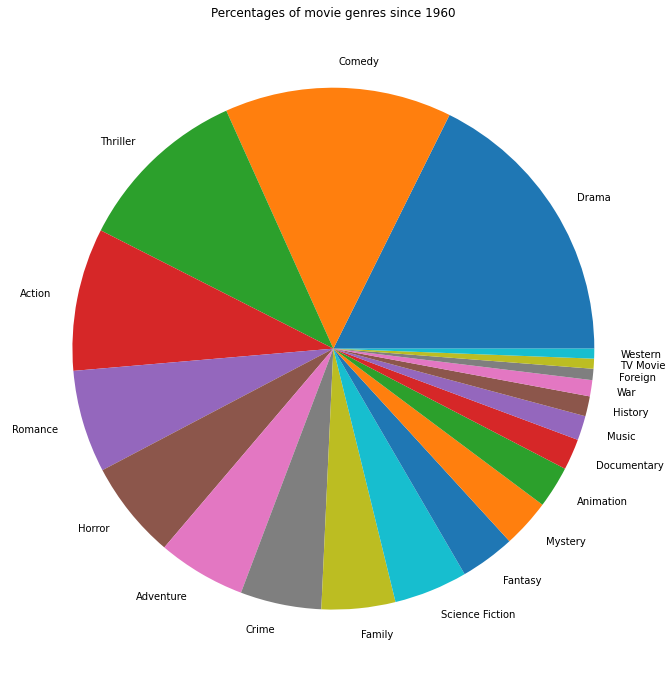

In [34]:
count = {}
find_genres(df, count)
# sorting the genres in descending order
count = sorted(count.items(), key = lambda x: x[1], reverse=True)
count = dict(count)
# plotting the results
plt.figure(figsize=(12,12))
plt.pie(count.values(), labels=count.keys())
plt.title('Percentages of movie genres since 1960')
plt.show()

from the above pie chart, we notice that Drame and Comedy are the most common genres. Western is the least produced genre.
<a id='q8'></a>
### How many movies did each production company make?

In [35]:
def count_prod_companies(df, count):
    """
    df: (dataframe) the dataframe with the data
    count: (dict) the count
    """
    prod_companies = df['production_companies'].str.split('|').values
    for prod_com in prod_companies:
        for prod_c in prod_com:
            count[prod_c] = count.get(prod_c, 0) + 1

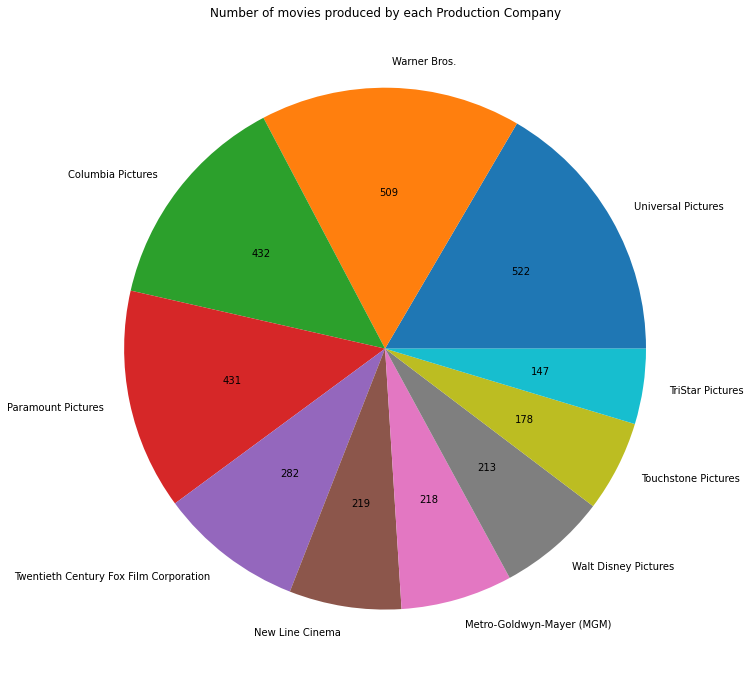

In [36]:
count = {}
count_prod_companies(df, count)
# Columbia Pictures is written as "Columbia Pictures" and "Columbia Pictures Corporation"
# We solve this unconsistency in the following two lines of code
count['Columbia Pictures'] = count['Columbia Pictures'] + count['Columbia Pictures Corporation']
del count['Columbia Pictures Corporation']
# sorting the results
count = sorted(count.items(), key = lambda x: x[1], reverse=True)
count = dict(count)
total = np.array(list(count.values())[2:12]).sum()
# plotting the results
plt.figure(figsize=(12,12))
plt.pie(list(count.values())[2:12], labels=list(count.keys())[2:12], autopct=lambda p: '{:.0f}'.format(p * total / 100))
plt.title('Number of movies produced by each Production Company')
plt.show()

- We see that Universal Pictures and Warner Bros are dominating with over 500 movies each.
- Paramount Pictures and Colombia Pictures comes after with about 432 and 431 movies respectively.
- Twentieth Century Fox Film Corporation have almost 300 movies

Now let's check the relationship between different variables. I will start by `revenue` against `budget` in the following:

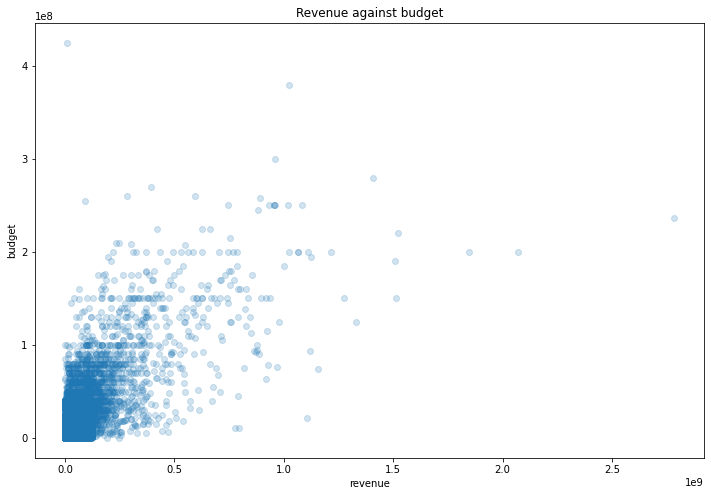

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(df['revenue'], df['budget'], alpha=0.2)
plt.title('Revenue against budget')
plt.xlabel('revenue')
plt.ylabel('budget')
plt.show()

The relationship between `Revenue` and `Budget` looks somewhat linear but isn't that strong. In the next code cell I will verify the power of the linear relationship where 1 means strongest and 0 means no linear relationship.

In [38]:
df[['revenue', 'budget']].corr().iloc[0,1]

0.645008016976542

It is expected that popular movies will have more votes. Let's check whether there is a relationship between `vote_count` and `popularity`. 

In [39]:
df[['vote_count', 'popularity']].corr().iloc[0,1]

0.80078608712491

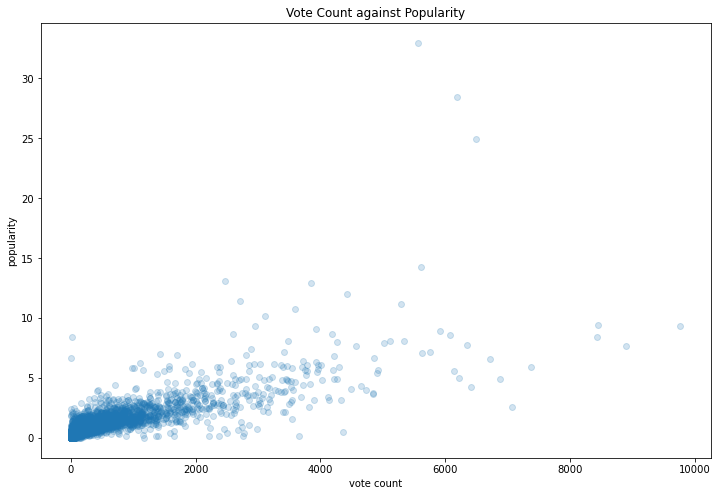

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(df['vote_count'], df['popularity'], alpha=0.2)
plt.title('Vote Count against Popularity')
plt.xlabel('vote count')
plt.ylabel('popularity')
plt.show()

We observe a high linear relationship (0.8) between `vote_count` and `popularity` of the movie which is expected as the more popular the movie is, the more votes it will get.

<a id='conclusions'></a>
## Conclusions

- The number of movies directed every year increased exponentially since 1960 untill 2014. It is expected to rise more in the next years.
- The top 5 movies `Jurassic World`, `Mad Max: Fury Road`, `Interstellar`, `Guardians of the Galaxy` and `Insurgent` are all released after 2014.
- There are two movies that surpassed the 2 billion $ revenue that are `Avatar` and `Star Wars: The Force Awakens`.
- `Colin Trevorrow` who directed `Jurassic World` surprisingly directed only one other movie that is `Safety Not Guaranteed`.
- The director that released the most movies is `Woody Allen` with 45 movies.
- Most popular movies tend to be long ones (over 2 hours).
- In the last half decade, Drama and Comedy dominated the movie genres as the people's favorite.
- Big production companies produced over 400 movies such as `Universal Pictures`, `Warner Bros`, `Paramount Pictures` and `Colombia Pictures`.
- `revenue` and `budget` have some sort of a linear relationship. That is the more spent on a movie, the more revenue it is expected to generate.
- There is a high linear relationship between `vote_count` and `popularity` which is understandable.

## Limitations
- We included all the movie genres in the calculation although many movies have more than one genre assigned to it seperated by `|`.
- `vote_count` & `vote_average` are not clear on how to find them and have no formula of calculation.
- `budget` & `revenue` have a lot of 0's and are filled with the mean for that year for the current situation but this may not help us if we want to do any further analysis.
- Overall the missing and 0 values are limiting any further analysis or complex inferential statistics.